# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)





\begin{equation}
A = As - 2\frac{(r\cos\theta/2 )(r\sin\theta/2)}{2} 
\end{equation}


\begin{equation}
\theta-\sin \theta = \frac{\pi}{2}
\end{equation}



\begin{equation}
f(\theta)= \theta- \sin \theta - \frac{\pi}{2}=0
\end{equation}

resultado con bisect 2.309881460010274
resultado con rangente 2.309881460010057
resultado con newton 2.3098814600100575


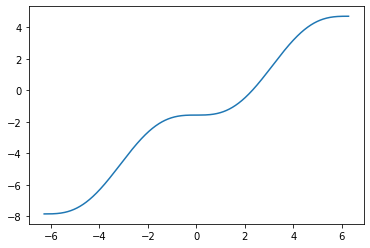

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, interpolate
from scipy.special import lambertw
# A y B
def f(theta): 
  return theta-np.sin(theta)-np.pi/2 #funcion igualada a cero donde la original es igualada a pi/2

def f_prima(theta):
  return 1 - np.cos(theta) 
# C
df = pd.DataFrame({"theta":np.linspace(-2*np.pi,2*np.pi,1000)}) # Dataframe  con los angulos
# D
df["f(theta)"] = f(np.linspace(-2*np.pi,2*np.pi,1000)) # columna con valores

# F
plt.plot(df["theta"],df["f(theta)"]) # Grafico  F_theta" vs "theta"

#G
# Primer argumento: funcion, segundo: primer punto, tercero: segundo punto
print("resultado con bisect",optimize.bisect(f,1,4))

# Primer argumento: funcion, segundo: valor, tercero: derivada funcion
print("resultado con rangente",optimize.newton(f,1,f_prima))

# Primer argumento: funcion, segundo: valor
print("resultado con newton",optimize.newton(f,1))




# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si u es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [ ]:
v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

# 1.
def pos_x(t, theta, alpha, v0, b, u, g): # Funcion de posicion x
  x = (u*np.cos(alpha)*t)+((v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp(-b*t)))/b
  return x

def pos_y(t, theta, alpha, v0, b, u,g): # Funcion de posicion y
  y = (1/b)*((g/b)+(v0*np.sin(theta))-u*np.sin(alpha))*(1-np.exp(-b*t))-((g/b)-u*np.sin(alpha))*t
  return y 

In [25]:
# 2 y 3
time = np.linspace(0,30,1000)
list_x = pos_x(time,theta,alpha,v0,b,u,g) # Lista de posiciones en X
list_y = pos_y(time,theta,alpha,v0,b,u,g) # Lista de posiciones en Y
df = pd.DataFrame({"X":list_x,"Y":list_y,"Tiempo":time})


Text(0.5, 1.0, 'X en funcion del Tiempo')

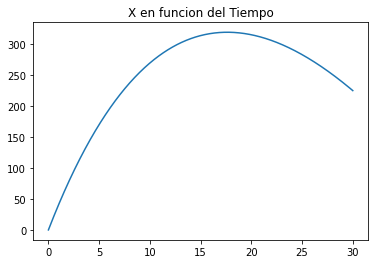

In [ ]:
# 4.A
plt.plot(df["Tiempo"],df["X"])
plt.title("X en funcion del Tiempo")

Text(0.5, 1.0, 'Y en funcion del Tiempo')

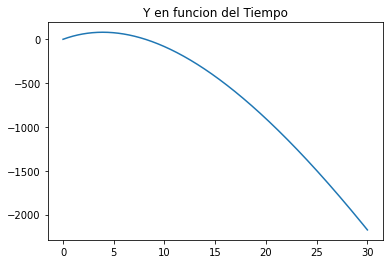

In [ ]:
#4.B
plt.plot(df["Tiempo"],df["Y"])
plt.title("Y en funcion del Tiempo")

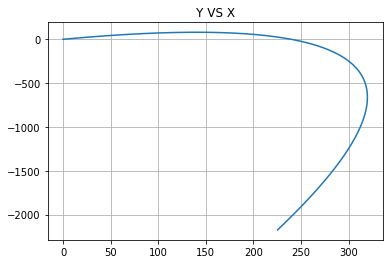

In [ ]:
# 4.C
plt.plot(df["X"],df["Y"])
plt.title("Y VS X")
plt.grid()

Con la ecuacion de y igualada a 0
\begin{equation}
0= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-e^{-bt})-\left( \frac{g}{b}-u\sin\alpha\right)
\end{equation}
\begin{equation}
(\frac{g}{b}-u\sin\alpha)t = (\frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-e^{-bt}))
\end{equation}

\begin{equation}
(\frac{g}{b}-u\sin\alpha)t = \left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(\frac{1}{b}-\frac{1}{b}e^{-bt})
\end{equation}

\begin{equation}
(\frac{g}{b}-u\sin\alpha)t = \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)- \left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)\frac{1}{b}e^{-bt}
\end{equation}

\begin{equation}
(\frac{g}{b}-u\sin\alpha)t - \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)= - \left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)\frac{1}{b}e^{-bt}
\end{equation}

\begin{equation}
\frac{(\frac{g}{b}-u\sin\alpha)}{ -\left(\frac{1}{b}(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right))}t +1=
e^{-bt}
\end{equation}

\begin{equation}
-b\frac{(\frac{g}{b}-u\sin\alpha)}{ \left(\frac{g}{b}+v_0 \sin \theta_0- u\sin\alpha \right)}t +1=
e^{-bt}
\end{equation}



Usando la funcion W de lambert donde $y = xe^{x}$ entonces $x = W(y)$

Con la ecuacion 
\begin{equation}
p^{ax+b}=cx+d
\end{equation}

Siendo $p >0$ y $c,d\neq 0$ . La solucion de la ecuacion es:
\begin{equation}
x=-{\frac {W(-{\frac {a\ln p}{c}}\,p^{b-{\frac {ad}{c}}})}{a\ln p}}-{\frac {d}{c}}
\end{equation}

Sea:

$p = e$

$a = -b $

$b = 0$

$c = -b\frac{(\frac{g}{b}-u\sin\alpha)}{(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha )}$

$d = 1$

\begin{equation}
x=-{\frac {W_0(-{\frac {a\ln p}{c}}\,p^{b-{\frac {ad}{c}}})}{a\ln p}}-{\frac {d}{c}}
\end{equation}



Se remplaza con los valores




\begin{equation}
t = \frac{-W_0(-(-b)\frac{\ln{e}}{-b\frac{(\frac{g}{b}-u\sin\alpha)}{(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha )}}*e^{-\frac{(-b)(1)}{-b\frac{(\frac{g}{b}-u\sin\alpha)}{(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha )}}})}
{-b*\ln{e}}-\frac{1}{-b\frac{(\frac{g}{b}-u\sin\alpha)}{(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha )}}
\end{equation}

\begin{equation}
t = \frac{W_0(-\frac{(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha )}{(\frac{g}{b}-u\sin\alpha){}}*e^{-\frac{(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha )}{(\frac{g}{b}-u\sin\alpha)}})}
{b}+\frac{(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha )}{b(\frac{g}{b}-u\sin\alpha)}
\end{equation}

La ecuacion del tiempo total del vuelo viene dada por

\begin{equation}
t_{total} = \frac{W_0(-(1+\frac{v_0 \sin \theta_0 }{\frac{g}{b}-u\sin\alpha})*e^{-(1+\frac{v_0 \sin \theta_0}{\frac{g}{b}-u\sin\alpha})})}
{b}+\frac{(1+\frac{v_0 \sin \theta_0}{\frac{g}{b}-u\sin\alpha})}{b}
\end{equation}

Text(0.5, 0, 'angle($\\theta$)')

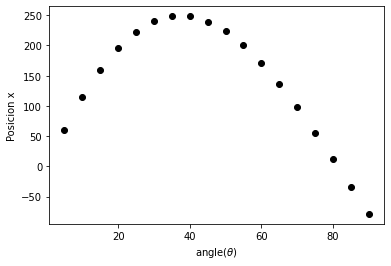

In [36]:
def time_final(v0,theta,alpha,g,b,u):  # Funcion que halla el tiempo final 
                                      # Dados los parametros iniciales
  used = 1+(v0*np.sin(theta))/((g/b)-u*np.sin(alpha))
  first = (sc.special.lambertw(-used*np.exp(-used)))
  second = (used)
  return np.real(first+second)/b

times = []
thetas = np.arange(0,91,5)
# Creacion de lista con el punto final de x dependiendo del angulo
# 5
# A partir del tiempo final, se halla la posicion final de x
for i in thetas:
  times.append(time_final(v0,np.deg2rad(i),alpha,g,b,u))
x_ =  pos_x(np.array(times), np.deg2rad(thetas),np.pi,60,0.05,30,9.8) 
# 6
#Grafico de x respecto a theta
plt.plot(thetas,x_,"ko")
plt.ylabel("Posicion x")
plt.xlabel(r"angle($\theta$)")  

Text(0.5, 0, 'angle($\\theta$)')

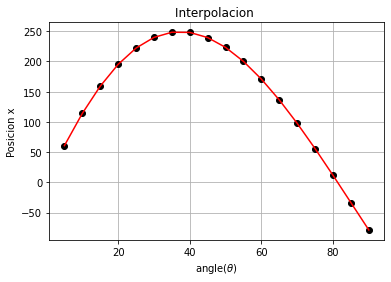

In [37]:
# 7
f=sc.interpolate.interp1d(thetas,x_) # Interpolacion a partir del df1
plt.grid()
plt.plot(thetas, x_, "ko")
plt.plot(thetas,x_,"r-")
plt.title("Interpolacion ")
plt.ylabel("Posicion x")
plt.xlabel(r"angle($\theta$)")  